In [1]:
 # Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
 # Importing the dataset
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')



## Exploratory Data Analysis

In [3]:
dataset_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

C:\Users\Vijay Krishna\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


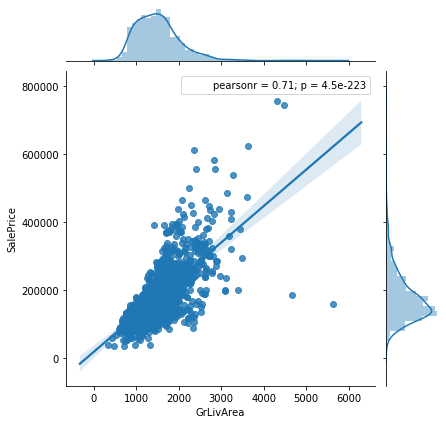

In [5]:
import scipy.stats as stats
sns.jointplot(dataset_train.GrLivArea,dataset_train.SalePrice,kind='reg',stat_func = stats.pearsonr)
plt.show()

## Feature Selection

In [6]:
num=dataset_train.select_dtypes([np.number]).columns.tolist()
dataset_train[num].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


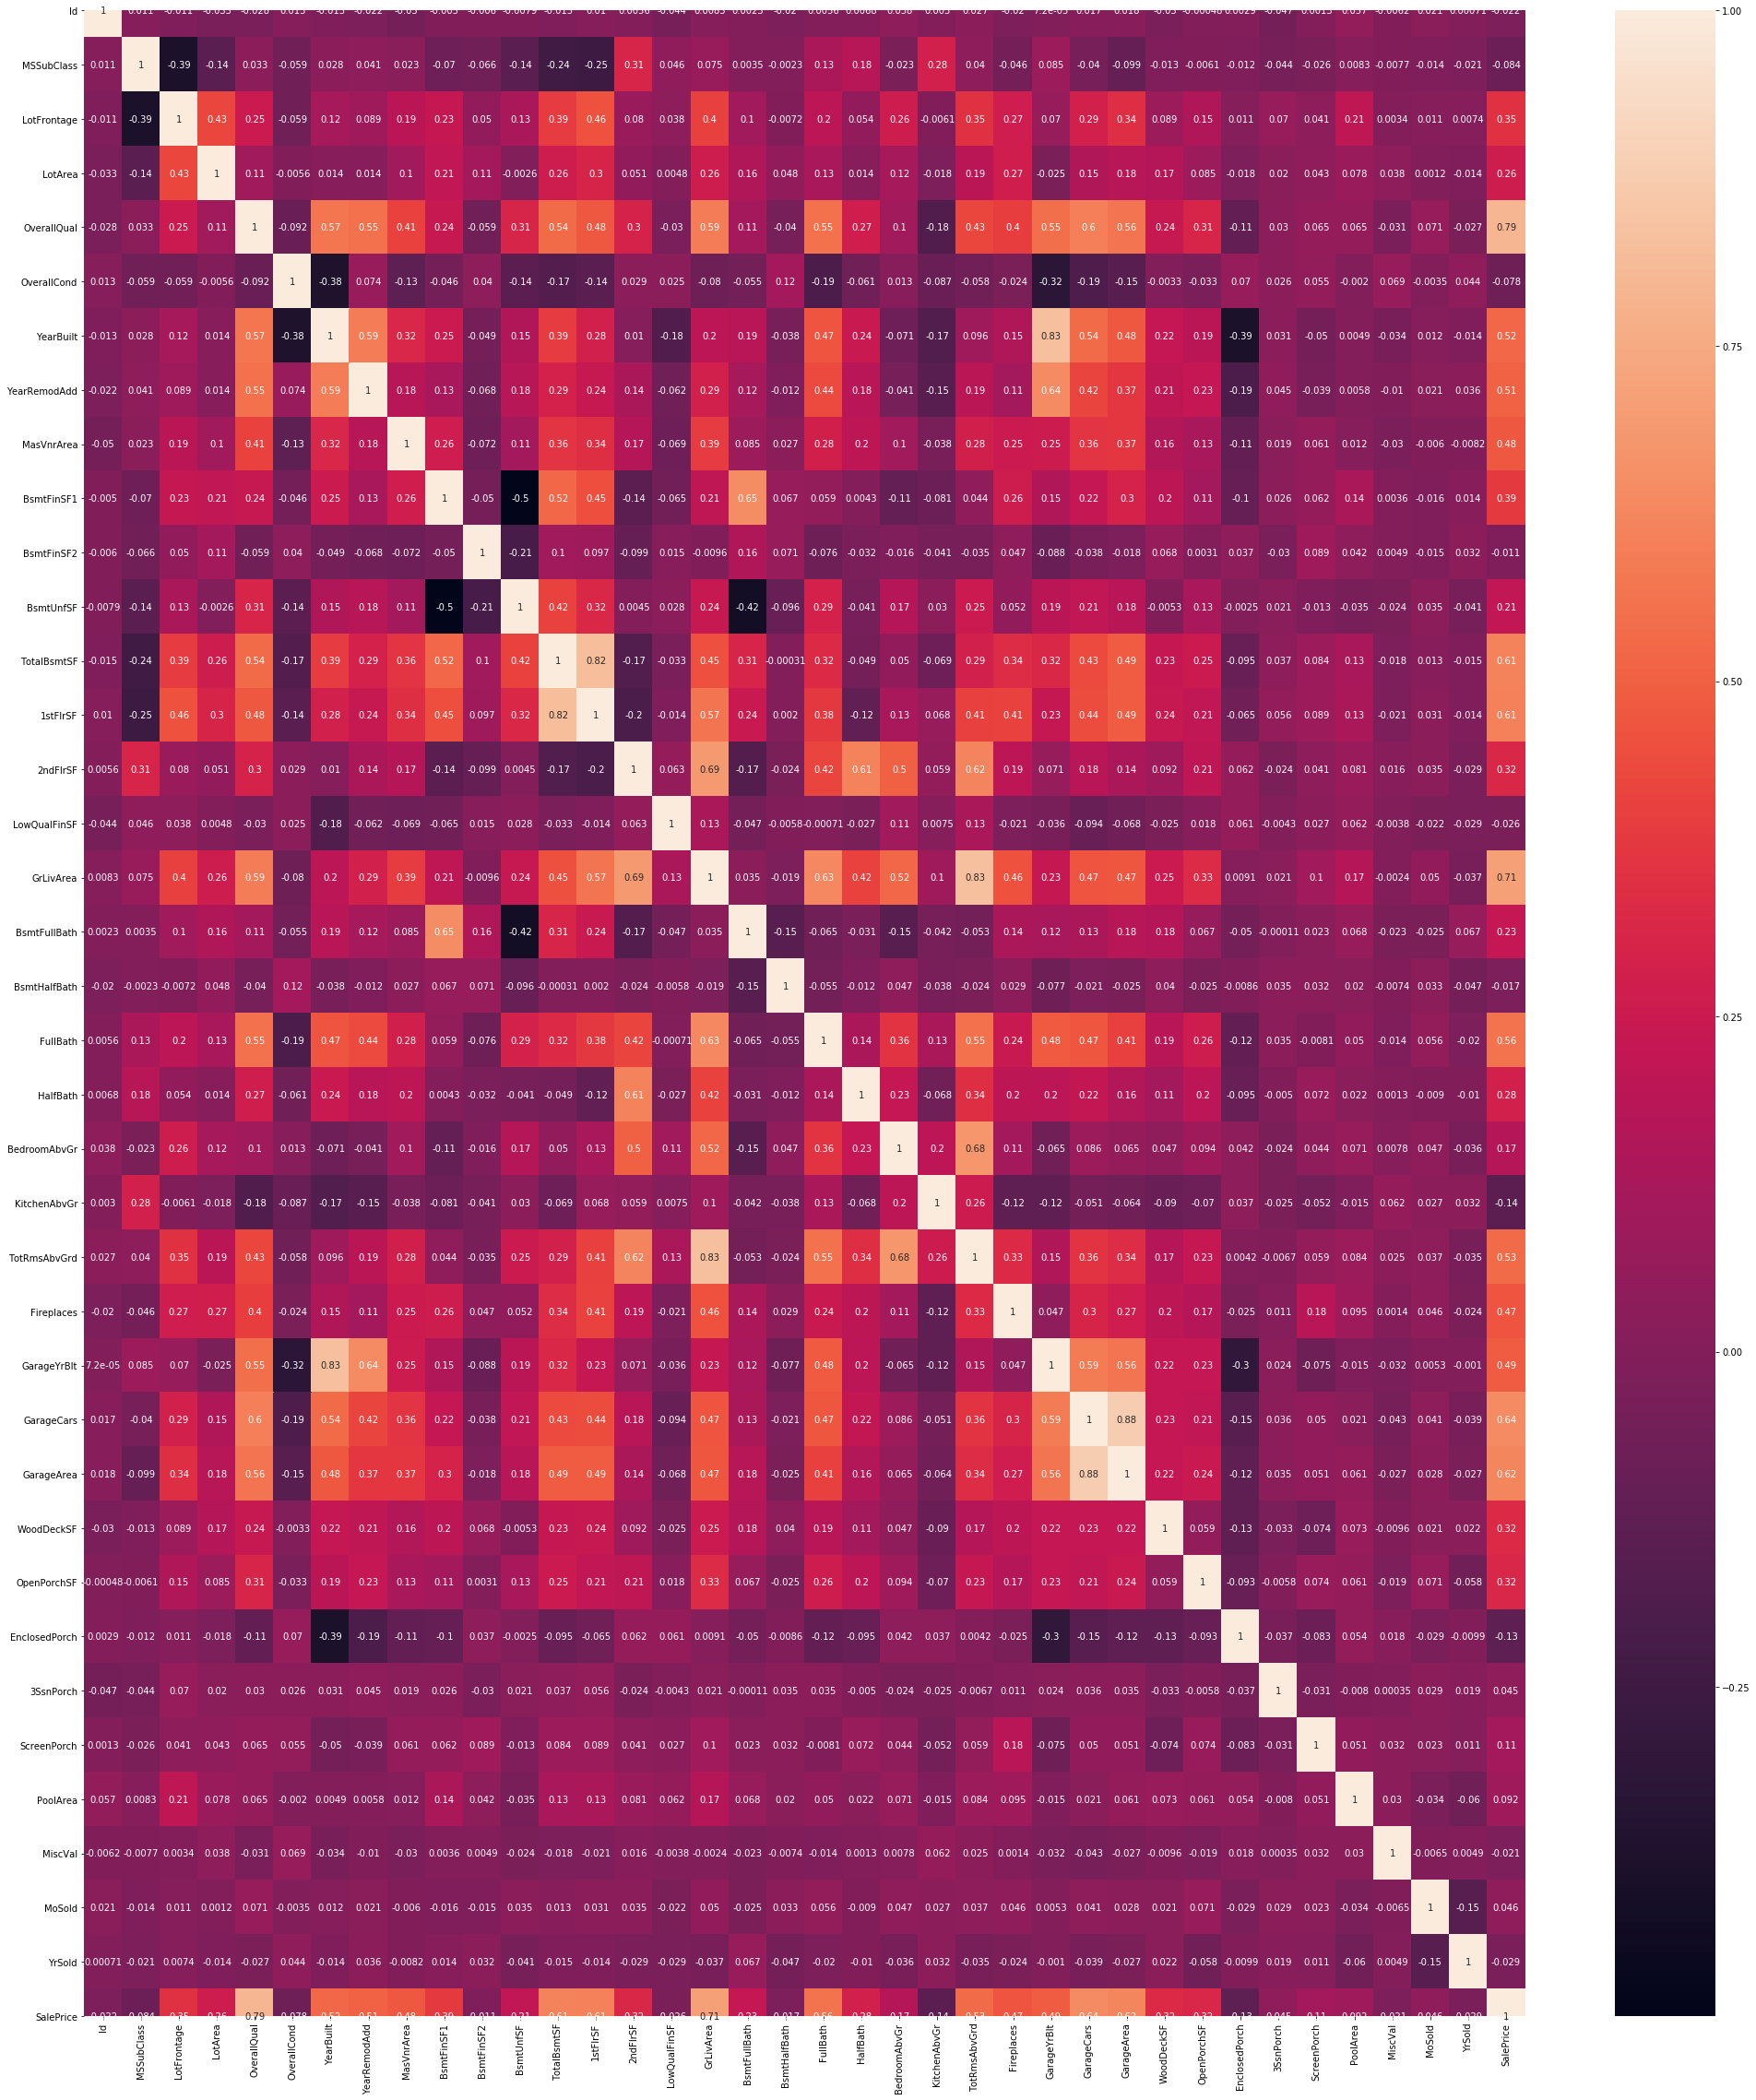

In [7]:
plt.figure(figsize=(35,40))
sns.heatmap(dataset_train[num].corr(),annot=True)
plt.show()

In [8]:
dataset_test= dataset_test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Id'],axis=1)
dataset_train = dataset_train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Id'],axis=1)


## Feature Engineering
### Filling the Null Values With Means(Numerical) and Modes(Categorical)

In [9]:
dataset_train['LotFrontage'] = dataset_train['LotFrontage'].fillna(dataset_train['LotFrontage'].mean())
dataset_test['LotFrontage'] = dataset_test['LotFrontage'].fillna(dataset_test['LotFrontage'].mean())

dataset_train['MasVnrArea'] = dataset_train['MasVnrArea'].fillna(dataset_train['MasVnrArea'].mean())
dataset_test['MasVnrArea'] = dataset_test['MasVnrArea'].fillna(dataset_test['MasVnrArea'].mean())

dataset_train['MasVnrType'] = dataset_train['MasVnrType'].fillna(dataset_train['MasVnrType'].mode()[0])
dataset_test['MasVnrType'] = dataset_test['MasVnrType'].fillna(dataset_test['MasVnrType'].mode()[0])

dataset_test['MSZoning'] = dataset_test['MSZoning'].fillna(dataset_test['MSZoning'].mode()[0])
dataset_test['Utilities'] = dataset_test['Utilities'].fillna(dataset_test['Utilities'].mode()[0])

dataset_test['Exterior2nd'] = dataset_test['Exterior2nd'].fillna(dataset_test['Exterior2nd'].mode()[0])
dataset_test['Exterior1st'] = dataset_test['Exterior1st'].fillna(dataset_test['Exterior1st'].mode()[0])

dataset_test['BsmtFullBath'] = dataset_test['BsmtHalfBath'].fillna(dataset_test['BsmtFullBath'].mode()[0])
dataset_test['BsmtHalfBath'] = dataset_test['BsmtHalfBath'].fillna(dataset_test['BsmtHalfBath'].mode()[0])



dataset_train['BsmtQual'] = dataset_train['BsmtQual'].fillna(dataset_train['BsmtQual'].mode()[0])
dataset_test['BsmtQual'] = dataset_test['BsmtQual'].fillna(dataset_test['BsmtQual'].mode()[0])



In [10]:
dataset_train['BsmtCond'] = dataset_train['BsmtCond'].fillna(dataset_train['BsmtCond'].mode()[0])
dataset_test['BsmtCond'] = dataset_test['BsmtCond'].fillna(dataset_test['BsmtCond'].mode()[0])

dataset_train['BsmtExposure'] = dataset_train['BsmtExposure'].fillna(dataset_train['BsmtExposure'].mode()[0])
dataset_test['BsmtExposure'] = dataset_test['BsmtExposure'].fillna(dataset_test['BsmtExposure'].mode()[0])

dataset_train['BsmtFinType1'] = dataset_train['BsmtFinType1'].fillna(dataset_train['BsmtFinType1'].mode()[0])
dataset_test['BsmtFinType1'] = dataset_test['BsmtFinType1'].fillna(dataset_test['BsmtFinType1'].mode()[0])

dataset_test['BsmtFinSF1'] = dataset_test['BsmtFinSF1'].fillna(dataset_test['BsmtFinSF1'].mode()[0])

dataset_train['BsmtFinType2'] = dataset_train['BsmtFinType2'].fillna(dataset_train['BsmtFinType2'].mode()[0])
dataset_test['BsmtFinType2'] = dataset_test['BsmtFinType2'].fillna(dataset_test['BsmtFinType2'].mode()[0])

dataset_test['BsmtFinSF2'] = dataset_test['BsmtFinSF2'].fillna(dataset_test['BsmtFinSF2'].mode()[0])

dataset_test['BsmtUnfSF'] = dataset_test['BsmtUnfSF'].fillna(dataset_test['BsmtUnfSF'].mode()[0])

dataset_test['TotalBsmtSF'] = dataset_test['TotalBsmtSF'].fillna(dataset_test['TotalBsmtSF'].mode()[0])


dataset_test['KitchenQual'] = dataset_test['KitchenQual'].fillna(dataset_test['KitchenQual'].mode()[0])

dataset_test['Functional'] = dataset_test['Functional'].fillna(dataset_test['Functional'].mode()[0])

dataset_train['GarageType'] = dataset_train['GarageType'].fillna(dataset_train['GarageType'].mode()[0])
dataset_test['GarageType'] = dataset_test['GarageType'].fillna(dataset_test['GarageType'].mode()[0])

dataset_train['GarageYrBlt'] = dataset_train['GarageYrBlt'].fillna(dataset_train['GarageYrBlt'].mode()[0])
dataset_test['GarageYrBlt'] = dataset_test['GarageYrBlt'].fillna(dataset_test['GarageYrBlt'].mode()[0])


dataset_train['GarageFinish'] = dataset_train['GarageFinish'].fillna(dataset_train['GarageFinish'].mode()[0])
dataset_test['GarageFinish'] = dataset_test['GarageFinish'].fillna(dataset_test['GarageFinish'].mode()[0])

dataset_test['GarageCars'] = dataset_test['GarageCars'].fillna(dataset_test['GarageCars'].mean())

dataset_test['GarageArea'] = dataset_test['GarageArea'].fillna(dataset_test['GarageArea'].mean())

dataset_train['GarageQual'] = dataset_train['GarageQual'].fillna(dataset_train['GarageQual'].mode()[0])
dataset_test['GarageQual'] = dataset_test['GarageQual'].fillna(dataset_test['GarageQual'].mode()[0])

dataset_train['GarageCond'] = dataset_train['GarageCond'].fillna(dataset_train['GarageCond'].mode()[0])
dataset_test['GarageCond'] = dataset_test['GarageCond'].fillna(dataset_test['GarageCond'].mode()[0])

dataset_test['SaleType'] = dataset_test['SaleType'].fillna(dataset_test['SaleType'].mode()[0])



In [11]:


Cat_train = dataset_train.loc[:,['MSZoning','Street','LotShape','LandContour','LotConfig',
                               'LandSlope','Neighborhood','Condition1','BldgType','RoofStyle',
                               'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                               'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
                               ,'HeatingQC','CentralAir','KitchenQual','Functional','GarageType'
                               ,'GarageFinish','GarageCond','PavedDrive','SaleType','SaleCondition']]
                               

Num_train = dataset_train.loc[:,['LotArea','OverallQual','OverallCond','GrLivArea','YearBuilt',
                                 'YearRemodAdd','YrSold','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','BedroomAbvGr',
                                 'FullBath','HalfBath','Fireplaces','WoodDeckSF','OpenPorchSF','KitchenAbvGr',
                                 'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','LowQualFinSF','GarageYrBlt',
                                 'YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath',
                                 'TotalBsmtSF','GarageArea','MasVnrArea','GarageCars','LotFrontage','MSSubClass']]



In [12]:
X_train = np.append(Num_train,Cat_train,axis=1)

y_train = dataset_train.iloc[:,-1].values 

Cat_test = dataset_test.loc[:,['MSZoning','Street','LotShape','LandContour','LotConfig',
                               'LandSlope','Neighborhood','Condition1','BldgType','RoofStyle',
                               'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                               'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
                               ,'HeatingQC','CentralAir','KitchenQual','Functional','GarageType'
                               ,'GarageFinish','GarageCond','PavedDrive','SaleType','SaleCondition']]
                               
Num_test = dataset_test.loc[:,['LotArea','OverallQual','OverallCond','GrLivArea','YearBuilt',
                                 'YearRemodAdd','YrSold','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','BedroomAbvGr',
                                 'FullBath','HalfBath','Fireplaces','WoodDeckSF','OpenPorchSF','KitchenAbvGr',
                                 'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','LowQualFinSF','GarageYrBlt',
                                 'YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath',
                                 'TotalBsmtSF','GarageArea','MasVnrArea','GarageCars','LotFrontage','MSSubClass']]


X_test = np.append(Num_test,Cat_test,axis=1)



### Encoding 

In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
LabelEncoder_X_train =  LabelEncoder()
k = len(X_train[0])
for i in range(34,k):
    X_train[:,i]=LabelEncoder_X_train.fit_transform(X_train[:,i])


for i in range(34,k):
    OneHotEncoder_X_train = OneHotEncoder(categorical_features = [-1])
    X_train=OneHotEncoder_X_train.fit_transform(X_train).toarray()


  # X_test
LabelEncoder_X_test =  LabelEncoder()
for i in range(34,k):
    X_test[:,i]=LabelEncoder_X_test.fit_transform(X_test[:,i])

for i in range(34,k):
    OneHotEncoder_X_test = OneHotEncoder(categorical_features = [-1])
    X_test=OneHotEncoder_X_test.fit_transform(X_test).toarray()
 
                               # Dummy Variable Trap 
X_test=X_test[:,1:]
X_train=X_train[:,1:]




## Fitting the Data

In [14]:
# Fitting the Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor         # Importing Class form LIB
Regressor = RandomForestRegressor(n_estimators = 350,random_state=0)  # Object
Regressor.fit(X_train,y_train)      # Fitting



from xgboost import XGBRegressor
Regressor_2 =XGBRegressor(random_state=47)
Regressor_2.fit(X_train,y_train)







[18:44:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=47,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Predicting

In [15]:
y_pred = Regressor.predict(X_test)

y_pred_2 = Regressor_2.predict(X_test)                        
